# Google Earth Engine Experiments

In [32]:
import ee
ee.Initialize()

## First, let's convert OSM file to Pandas DataFrame 

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import xml.etree.ElementTree as ET
import osmread 
import io

from collections import Counter
import pdb
from pprint import pprint as print

print(f"path: {sys.path}")

("path: ['..', '..', '..', '', "
 "'/home/hayley/miniconda3/envs/fastai/lib/python36.zip', "
 "'/home/hayley/miniconda3/envs/fastai/lib/python3.6', "
 "'/home/hayley/miniconda3/envs/fastai/lib/python3.6/lib-dynload', "
 "'/home/hayley/miniconda3/envs/fastai/lib/python3.6/site-packages', "
 "'/home/hayley/miniconda3/envs/fastai/lib/python3.6/site-packages/defusedxml-0.5.0-py3.6.egg', "
 "'/home/hayley/miniconda3/envs/fastai/lib/python3.6/site-packages/IPython/extensions', "
 "'/home/hayley/.ipython']")


In [42]:
pwd

'/home/hayley/Workspace/MINT/Notebooks'

In [85]:
if ".." not in sys.path:
    sys.path.insert(0,'..')

In [86]:
print(sys.path)

['..',
 '',
 '/home/hayley/miniconda3/envs/fastai/lib/python36.zip',
 '/home/hayley/miniconda3/envs/fastai/lib/python3.6',
 '/home/hayley/miniconda3/envs/fastai/lib/python3.6/lib-dynload',
 '/home/hayley/miniconda3/envs/fastai/lib/python3.6/site-packages',
 '/home/hayley/miniconda3/envs/fastai/lib/python3.6/site-packages/defusedxml-0.5.0-py3.6.egg',
 '/home/hayley/miniconda3/envs/fastai/lib/python3.6/site-packages/IPython/extensions',
 '/home/hayley/.ipython']


In [45]:
import osmread
osm_data = osmread.parse_file('../data/highways.osm')

In [46]:
entities = Counter()
etypes = [osmread.Node, osmread.Way, osmread.Relation]
for entity in osmread.parse_file('../data/highways.osm')
    for etype in etypes:
        if isinstance(entity, etype):
            etype_name = etype.__name__
            entities[etype_name] += 1
            e = entity
print(entities)

SyntaxError: invalid syntax (<ipython-input-46-94f73148a259>, line 3)

Here is an example of an entity read by `osmread`

In [47]:
e

Relation(id=7073554, version=2, changeset=57987453, timestamp=1523401664, uid=186592, tags={'natural': 'wetland', 'source': 'Bing', 'type': 'multipolygon', 'wetland': 'marsh'}, members=(RelationMember(role='outer', type=<class 'osmread.elements.Way'>, member_id=397769313), RelationMember(role='outer', type=<class 'osmread.elements.Way'>, member_id=480447781)))

In [49]:
for entity in osmread.parse_file('../data/highways.osm'):
    if isinstance(entity, etypes[0]):
        myE = entity
        break

In [59]:
osmread.Node._fields

('id', 'version', 'changeset', 'timestamp', 'uid', 'tags', 'lon', 'lat')

In [65]:
etypes[0].__name__

'Node'

Now let's create pandas.DataFrame for each entity type

In [75]:
def init_df(etype):
    columns = etype._fields
    return pd.DataFrame(columns=columns)

def init_dfs(etypes):
    dfs = {}
    for etype in etypes:
        dfs[etype.__name__] = init_df(etype)
    return dfs
#     return { (etype.__name__, init_df(etype)) for etype in etypes }

In [87]:
def test_init_df():
    print(f"\nNode:\n {init_df(osmread.Node)}")
    print(f"\nWay:\n {init_df(osmread.Way)}")
    print(f"\nRelation:\n {init_df(osmread.Relation)}")
    
def test_init_dfs():
    print(init_dfs(etypes))
test_init_dfs()

{'Node': Empty DataFrame
Columns: [id, version, changeset, timestamp, uid, tags, lon, lat]
Index: [],
 'Relation': Empty DataFrame
Columns: [id, version, changeset, timestamp, uid, tags, members]
Index: [],
 'Way': Empty DataFrame
Columns: [id, version, changeset, timestamp, uid, tags, nodes]
Index: []}


In [95]:
def entity_dfs(entity, dfs):
    """
    Given an entity (each itered object from osmread.parse_file),
    add the entity information to the dataframe for its entity type.
    
    Args
    :type : (osmread.elements), (list of pd.DataFrames)
    :rtype : (list of pd.DataFrames)
    """
    pdb.set_trace()
    etype = entity.__class__
    etype_name = etype.__name__
    df = dfs[etype_name]
    row = []
    for attr in df.columns:
        if attr == 'tags':
            val = None
        else:
            val = getattr(entity, attr)
        row.append(val)
    df.
    print(dfs)

In [96]:
entity

Node(id=237251142, version=1, changeset=660958, timestamp=1200661513, uid=13467, tags={'created_by': 'JOSM'}, lon=31.57008, lat=6.19916)

In [128]:
d = dfs['Node'].copy()
print(len(d.columns))
d.iloc(1) = 1

SyntaxError: can't assign to function call (<ipython-input-128-ef9163e0bb63>, line 3)

In [121]:
pd.concat([d, [1]*8], axis=1)

TypeError: cannot concatenate object of type "<class 'list'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid

In [105]:
class Student():
    def __init__(self, name, age):
        self.name = name
        self.age = age
joe = Student('j', 10)
adam = Student('a', 20)

In [106]:
l = getattr(joe, 'name')
print(l)

'j'


In [129]:
import matplotlib.pyplot as plt

In [173]:
IM_DIR = plib.Path('/home/hayley/Workspace/Data/Aerial/')
im = plt.imread(IM_DIR/'train_images/KTraining_00.jpg')

In [176]:
lf= 'Workspace/Data/Aerial/colorAnnotation/KTraining_00.png'
label = plt.imread(lf)
# labels = plt.imread(IM_DIR/'colorAnnotation/KTraining_00.png')
# Workspace/Data/Aerial/train_images/KTraining_00_mask.tif

In [131]:
import pathlib as plib

In [172]:
!file '/home/hayley/Workspace/Data/Aerial/colorAnnotation/KTraining_00.png'

/home/hayley/Workspace/Data/Aerial/colorAnnotation/KTraining_00.png: PNG image data, 4679 x 5734, 8-bit/color RGB, non-interlaced


In [142]:
im = plt.imread(fname)

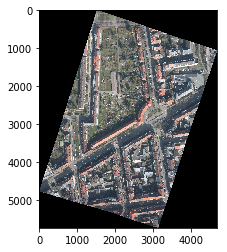

In [174]:
plt.imshow(im)

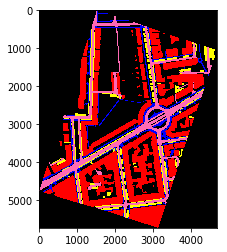

In [177]:
plt.imshow(label)

In [198]:
label.shape

(5734, 4679, 3)

0

In [186]:
(label[:,:,0] == 255).shape

(5734, 4679)

In [196]:
road = (label[:,:,0] == 255)  #(label[:,:,2] < 255)

In [190]:
label[road].shape

(0, 3)

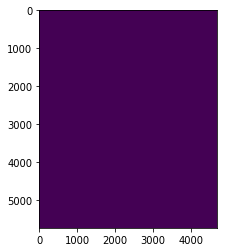

In [197]:
plt.imshow(road)

In [192]:
road.min()

False

In [193]:
road.max()

False

In [199]:
import torch

In [200]:
print(torch.__version__)

'0.4.1'
